##Import Libraries Yang diperlukan

In [2]:
#import the libraries
import numpy as np                ## linear algebra
import pandas as pd               ## data processing, dataset file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt   ## data visualization & graphical plotting
import seaborn as sns

#PreProcessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import silhouette_score

#Kmeans
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

#Hierarchy
from sklearn.metrics import silhouette_samples
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
import scipy.cluster.hierarchy as shc
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import AgglomerativeClustering

#DBScan
from sklearn.cluster import DBSCAN

##Load Dataset Customer Mall

In [4]:
#Load Data Customer Personality Analysis
data = pd.read_csv('/content/Mall_Customers.csv')
#Lihat 5 baris pertama data
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


##A. Preprocessing

###1. Melihat Info Data

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


###2. Drop Data atau Pengapusan Data

In [6]:
dropdata = 'CustomerID'
databaru = data.drop(dropdata, axis=1)
databaru.head(10)

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
5,Female,22,17,76
6,Female,35,18,6
7,Female,23,18,94
8,Male,64,19,3
9,Female,30,19,72


In [7]:
data.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

###3. Encode atau Permisalan Data

In [8]:
#Encode atau Permisalan pada data Gender
encode = databaru['Gender'].unique()
pemetaan = {nilai: urutan for urutan, nilai in enumerate(encode, start=1)}
databaru['Gender'] = databaru['Gender'].map(pemetaan)

#Lihat 5 baris pertama data
databaru.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,2,20,16,6
3,2,23,16,77
4,2,31,17,40


In [9]:
print(databaru.shape)

(200, 4)


###4. Describe Data

In [10]:
#Lihat statistik data
databaru.describe()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,1.560000,38.850000,60.560000,50.200000
std,0.497633,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,1.000000,28.750000,41.500000,34.750000
50%,2.000000,36.000000,61.500000,50.000000
75%,2.000000,49.000000,78.000000,73.000000
max,2.000000,70.000000,137.000000,99.000000


In [11]:
databaru.dtypes

Gender                    int64
Age                       int64
Annual Income (k$)        int64
Spending Score (1-100)    int64
dtype: object

###5. Missing Value

In [12]:
missing_value = databaru.isnull().sum()
missing_value

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

###6. Cek Data Duplikat

In [13]:
print(databaru[databaru.duplicated(keep=False)])

Empty DataFrame
Columns: [Gender, Age, Annual Income (k$), Spending Score (1-100)]
Index: []


###7.Normalisasi Data

In [14]:
#List nama feature
nama_kolom = ['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']

In [15]:
#Standarisasi feature
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
standardized = scaler.fit_transform(databaru)

new = pd.DataFrame(standardized, columns = nama_kolom)
new.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,-1.128152,-1.424569,-1.738999,-0.434801
1,-1.128152,-1.281035,-1.738999,1.195704
2,0.886405,-1.352802,-1.700830,-1.715913
3,0.886405,-1.137502,-1.700830,1.040418
4,0.886405,-0.563369,-1.662660,-0.395980


###8. Visualisasi Normalisasi Data

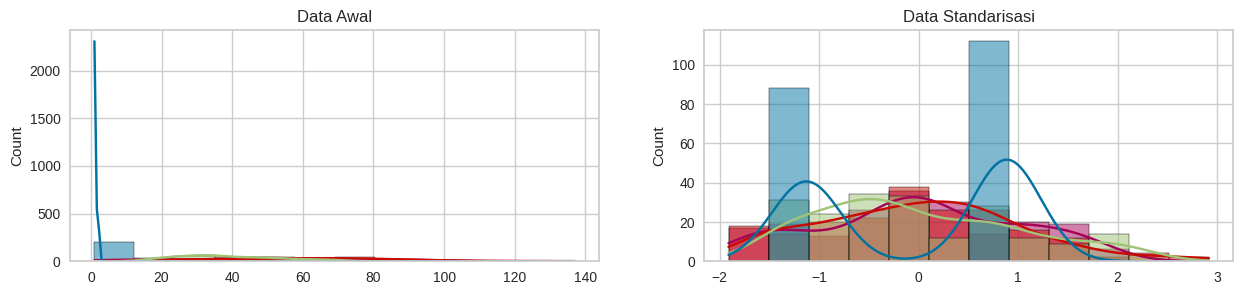

In [16]:
# plot both together to compare
fig, ax = plt.subplots(1, 2, figsize=(15, 3))
sns.histplot(databaru, ax=ax[0], kde=True, legend=False)
ax[0].set_title("Data Awal")
sns.histplot(new, ax=ax[1], kde=True, legend=False)
ax[1].set_title("Data Standarisasi")
plt.show()

##B. Algoritma Modelling

###1. K-Means Clustering

####a. Menggunakan Elbow Method untuk mencari jumlah kluster

In [17]:
new = standardized
wcss= []    # within cluster sum of squares
ss = []     # silouette score
for i in range(2,11):
    model = KMeans(n_clusters=i, n_init=10)
    model.fit_transform(new)
    wcss.append(model.inertia_)
    ss.append(silhouette_score(new,labels=model.predict(new)))

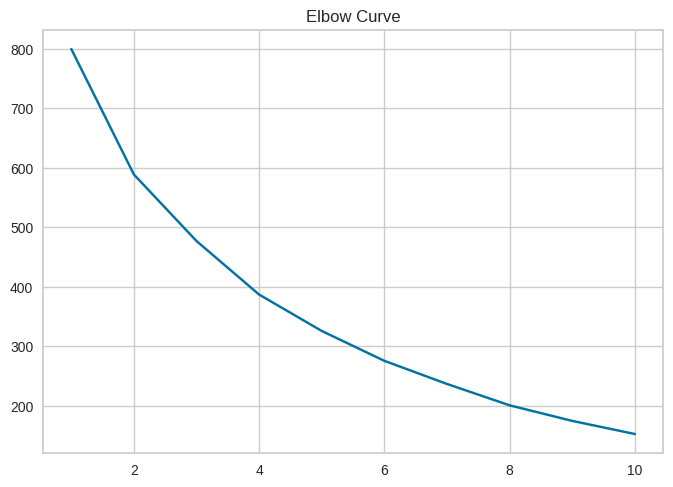

In [18]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(new)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('Elbow Curve')
plt.show()

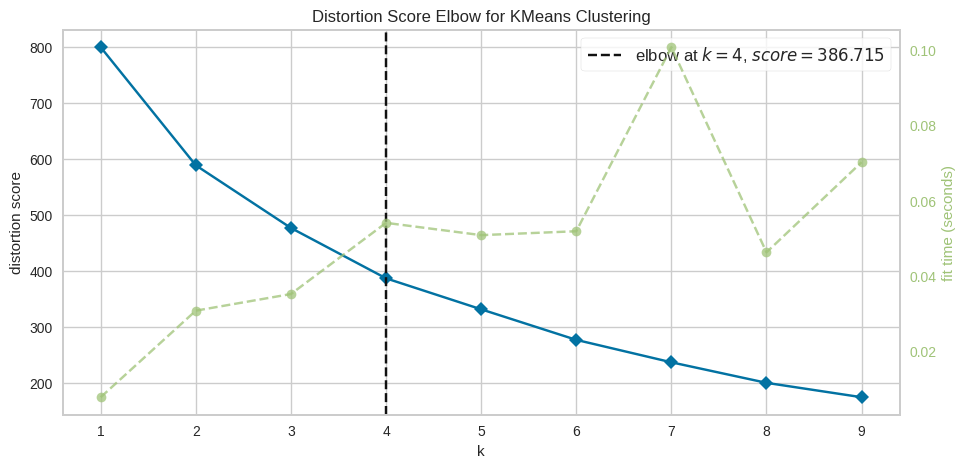

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [19]:
from yellowbrick.cluster import KElbowVisualizer

# Menerapkan model pengelompokan dan visualisator
model = KMeans(n_init=10)
visualizer = KElbowVisualizer(model, k=(1,10),size=(1080, 500))

visualizer.fit(new)        #  Menyesuaikan data dengan visualisator
visualizer.show()        # Menyelesaikan dan visualisasi gambar

####b. Menentukan Silhouette Score dan Visualisasi Silhouette untuk perbandingan evaluasi

In [20]:
# Membuat model dengan 4 cluster

kmeans = KMeans(n_clusters = 4, init='k-means++',random_state=42, n_init=10)
kmeans.fit(new)

# Menampilkan score siluet
print("silhouette_score is :",silhouette_score(new, kmeans.labels_, metric='euclidean'))

silhouette_score is : 0.3016237438985174


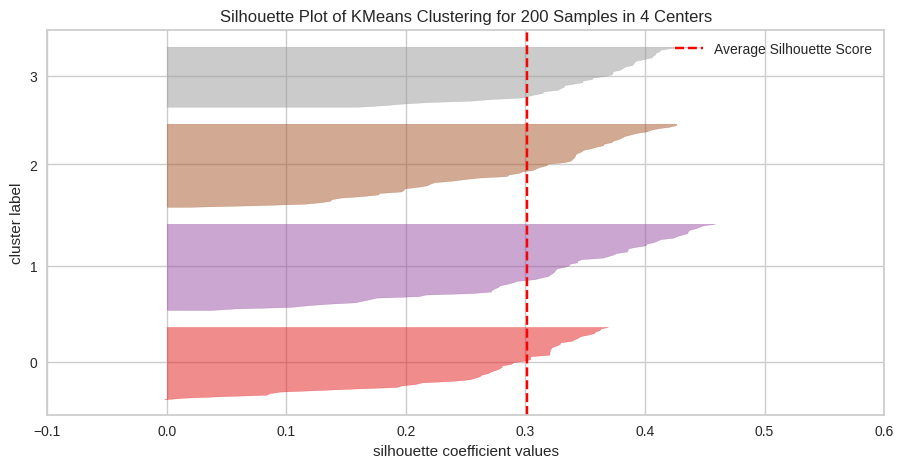

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 200 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [21]:
from yellowbrick.cluster import SilhouetteVisualizer
kmeans1 = KMeans(n_clusters = 4, init='k-means++',random_state=42, n_init=10)
visualizer = SilhouetteVisualizer(kmeans1,size=(1080, 500))

visualizer.fit(new)    #  Menyesuaikan data dengan visualisator
visualizer.show()    # Menyelesaikan dan visualisasi gambar

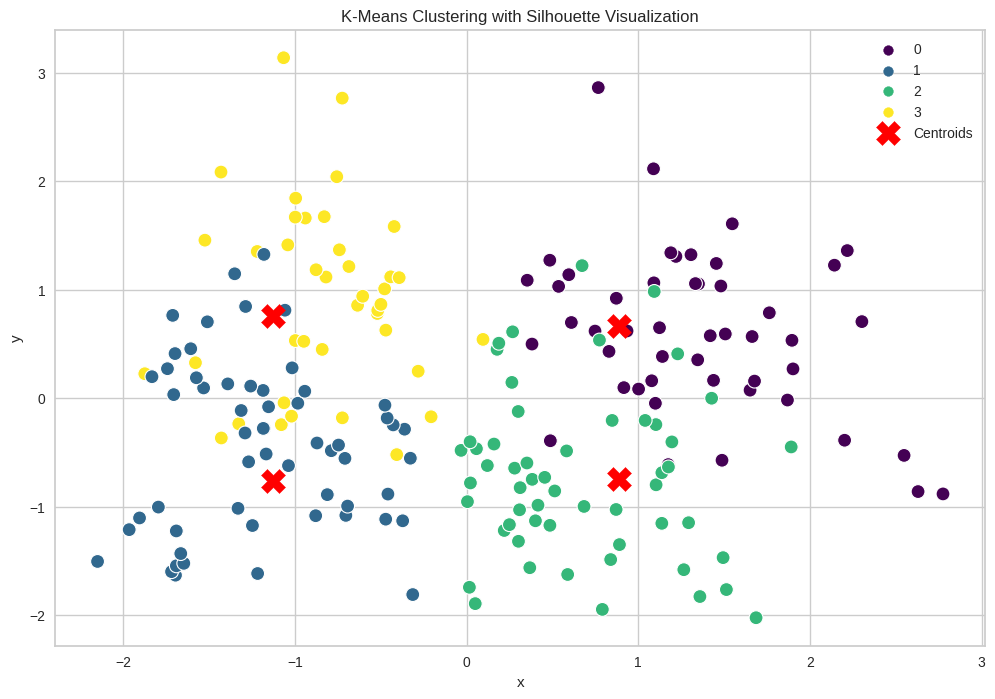

In [22]:
# Melakukan PCA pada data
pca = PCA(n_components=2)
pca_result = pca.fit_transform(new)

# Membuat model K-Means
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42, n_init=10)

# Menerapkan K-Means clustering pada data
kmeans.fit(new)

# Membuat visualisasi skatter plot
plt.figure(figsize=(12, 8))
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=kmeans.labels_, palette='viridis', s=100)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='X', label='Centroids')
plt.title('K-Means Clustering with Silhouette Visualization')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


###2. Hierarchal Clustering

####a. Menggunakan algoritma Hierarchical Clustering

In [23]:
hc = AgglomerativeClustering(n_clusters = 4, metric = 'euclidean', linkage ='ward')
y_hc = hc.fit_predict(new)
y_hc

array([1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 3, 1, 3, 0, 3, 2, 3, 2, 3,
       1, 3, 2, 3, 2, 3, 2, 3, 2, 3, 1, 3, 2, 3, 0, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3])

####b. Menggunakan Principal Component Analysis (PCA) untuk mengurangi dimensi

In [24]:
pca = PCA(n_components = 2)
X_pca = pca.fit_transform(new)

In [25]:
pca_data = pd.DataFrame(data = X_pca, columns = [f'PC{i+1}' for i in range(X_pca.shape[1])])
pca_data.head()

,PC1,PC2
0,-0.406383,-0.520714
1,-1.427673,-0.367310
2,0.050761,-1.894068
3,-1.694513,-1.631908
4,-0.313108,-1.810483


####c. Visualisasi Dendogram

- Metode Single

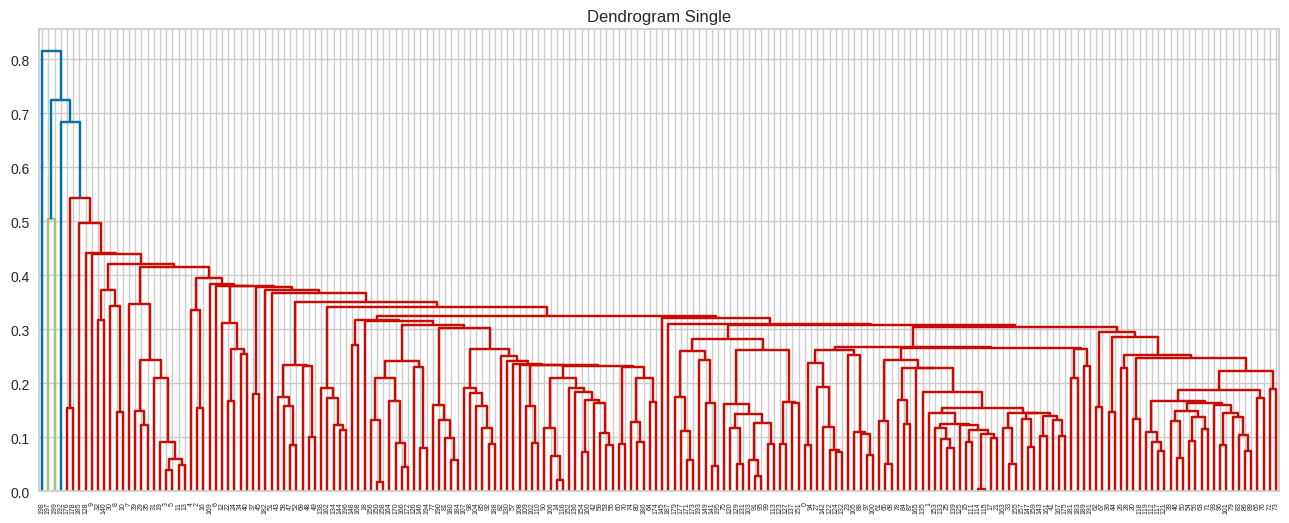

In [26]:
## Buat dendogram untuk mengetahui jumlah cluster yang optimal

plt.figure(figsize=(16,6))
model = AgglomerativeClustering(linkage='single')
labels = model.fit_predict(pca_data)
dendrogram1 = sch.dendrogram(sch.linkage(pca_data, method  = "single"))

plt.title('Dendrogram Single')
plt.show()

In [27]:
# Menghitung skor Silhouette
silhouette_avg = silhouette_score(pca_data, labels)

# Menampilkan skor Silhouette
print("Skor Silhouette:", silhouette_avg)

Skor Silhouette: 0.3389876390324481


- Metode Average

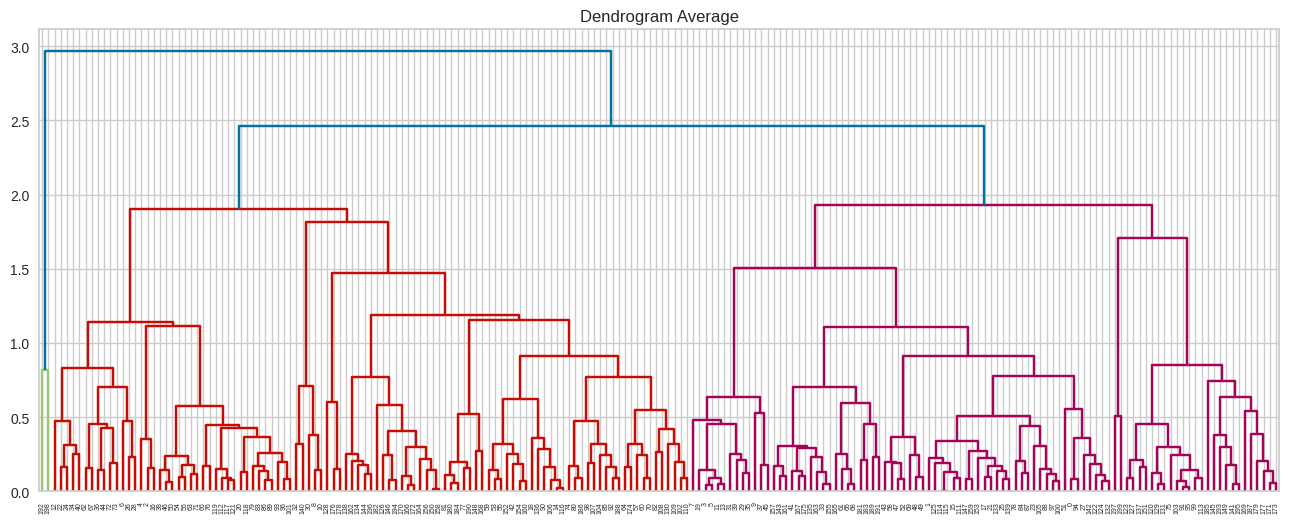

In [28]:
plt.figure(figsize=(16,6))
model2 = AgglomerativeClustering(linkage='average')
labels2 = model2.fit_predict(pca_data)
dendrogram1 = sch.dendrogram(sch.linkage(pca_data, method  = "average"))

plt.title('Dendrogram Average')
plt.show()

In [29]:
# Menghitung skor Silhouette
silhouette_avg2 = silhouette_score(pca_data, labels2)

# Menampilkan skor Silhouette
print("Skor Silhouette:", silhouette_avg2)

Skor Silhouette: 0.2896140591372985


- Metode Complete

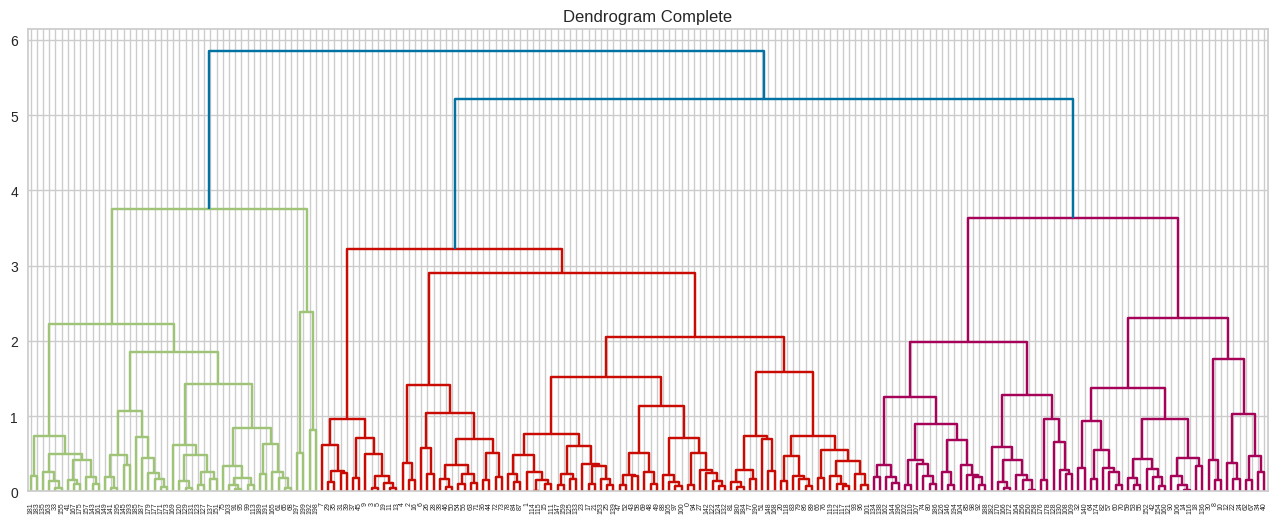

In [30]:
plt.figure(figsize=(16,6))
model3 = AgglomerativeClustering(linkage='complete')
labels3 = model3.fit_predict(pca_data)
dendrogram1 = sch.dendrogram(sch.linkage(pca_data, method  = "complete"))

plt.title('Dendrogram Complete')
plt.show()

In [31]:
# Menghitung skor Silhouette
silhouette_avg3 = silhouette_score(pca_data, labels3)

# Menampilkan skor Silhouette
print("Skor Silhouette:", silhouette_avg3)

Skor Silhouette: 0.28483483192788106


- Metode Ward

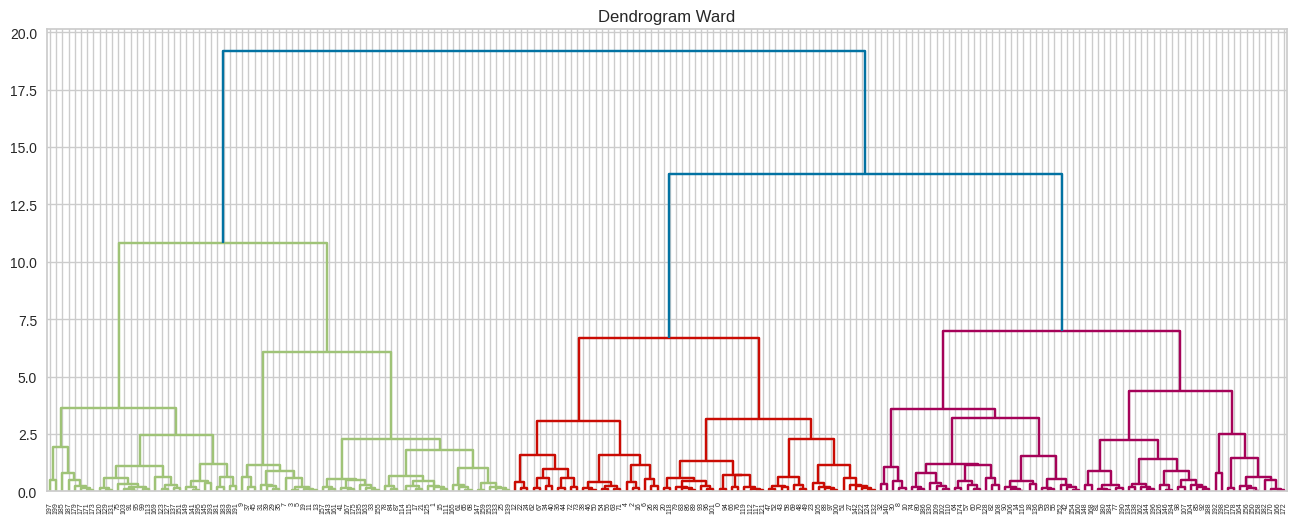

In [32]:
plt.figure(figsize=(16,6))
model4 = AgglomerativeClustering(linkage='ward')
labels4 = model4.fit_predict(pca_data)
dendrogram1 = sch.dendrogram(sch.linkage(pca_data, method  = "ward"))

plt.title('Dendrogram Ward')
plt.show()

In [33]:
# Menghitung skor Silhouette
silhouette_avg4 = silhouette_score(pca_data, labels4)

# Menampilkan skor Silhouette
print("Skor Silhouette:", silhouette_avg4)

Skor Silhouette: 0.36046552151661876


In [34]:
hc = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage ='ward')
y_hc = hc.fit_predict(pca_data)
y_hc

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 0, 1, 2, 1, 0, 1, 2, 1, 0, 1, 2, 1,
       2, 2, 2, 1, 2, 2, 2, 1, 0, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 2,
       2, 1, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 0, 0, 1, 2, 2, 0, 1,
       2, 2, 1, 2, 0, 2, 2, 2, 0, 3, 2, 0, 1, 2, 0, 0, 0, 2, 1, 0, 2, 1,
       2, 2, 0, 3, 0, 2, 2, 3, 2, 2, 0, 3, 2, 2, 0, 3, 0, 2, 0, 0, 0, 0,
       0, 1, 2, 3, 1, 1, 0, 2, 2, 2, 3, 2, 2, 3, 2, 1, 0, 3, 0, 3, 0, 3,
       2, 1, 0, 1, 0, 3, 0, 1, 0, 3, 2, 1, 0, 3, 0, 1, 0, 3, 0, 3, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 3, 0, 3, 0, 3, 0, 1,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3])

###3. DBSCAN Clustering

In [35]:
from sklearn.cluster import DBSCAN

In [36]:
model = DBSCAN(eps=1,min_samples=4)
cluster_labels = model.fit_predict(new)

In [37]:
silhouette_score(new,cluster_labels)

0.21256267605040682

In [38]:
np.unique(cluster_labels)

array([-1,  0,  1,  2])

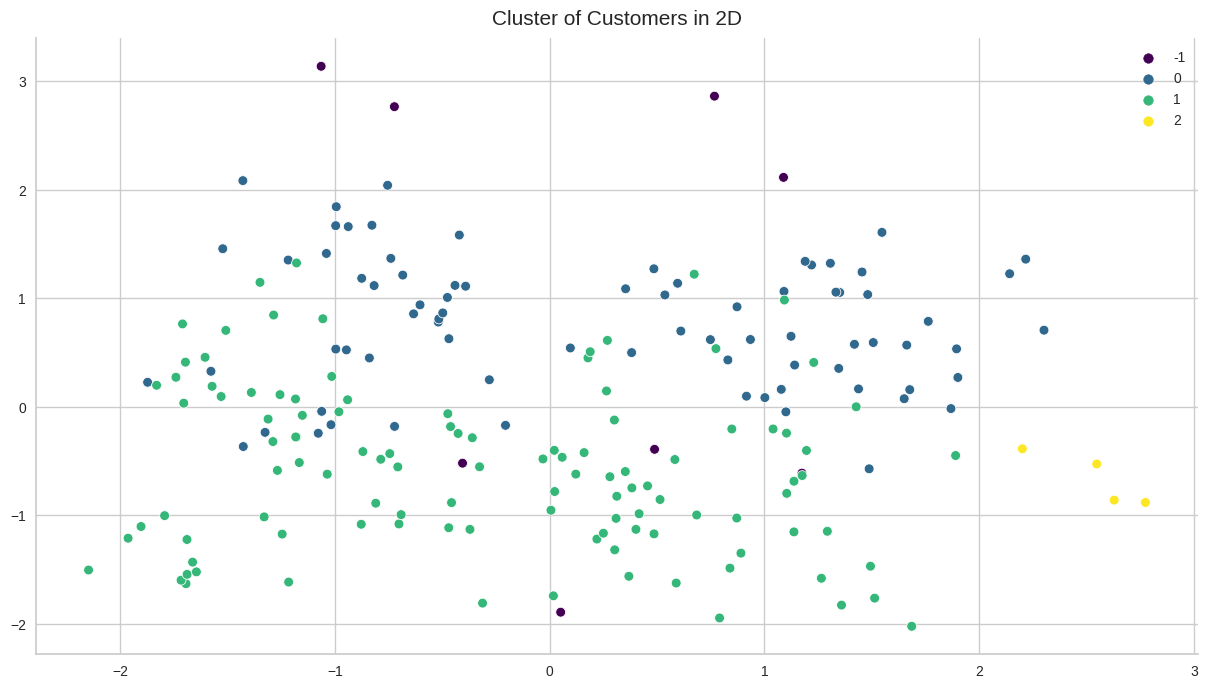

In [39]:
pca = PCA(2)
pca.fit(new)
X_PCA = pca.transform(new)

plt.figure(figsize=(15, 8))
sns.scatterplot(x=X_PCA[:, 0], y=X_PCA[:, 1], hue=cluster_labels, palette='viridis', s=50)
plt.title('Cluster of Customers in 2D', size=15, pad=10)
sns.despine()
plt.legend(loc=0, bbox_to_anchor=[1, 1])
plt.show()